# DATA ANALYSIS TASK
INNOMATICS RESEARCH LABS

INTERNSHIP TASK

N.PRIYANKA

# Missing values + outliers - Detection and Treatment + MORE 😁.

Dataset - adult.csv
Dataset Description - Google it  😑

Perform below mentioned tasks:
Step - 1 - Introduction -> Give a detailed data description and objective

Step - 2 - Import the data and perform basic pandas operations. 

Step - 3 - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..
Understand the probability and frequency distribution of each numerical column
Understand the frequency distribution of each categorical Variable/Column
Mention observations after each plot.

Step - 4 - Bivariate Analysis
Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..
Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
Mention observations after each plot.

Step - 5 - In the above steps you might have encountered many missing values and outliers. 
Find and treat the outliers and missing values in each column 😥
Read this Kaggle Notebook and understand various ways to detect and handle outliers. Try to implement the same. Outlier!!! The Silent Killer

Step - 6 - Conclusion of EDA
NOTE: Mention observations after each plot.🙄

Step - 7 - Perform feature transformation:
For Numerical Features -> Do Column Standardization
For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.

Step - 8 - Build various Machine Learning models considering ‘income’ as target variable.

Step - 9 - Create a table to compare the performance of each of the ML Model.

# STEP1:
GIVE DETAILED DESCRIPTION OF DATA AND ALSO THE OBJECTIVE

Data Set Information:

The given dataset extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

Data Set Characteristics :  Multivariate
Attribute Characteristics:  Categorical, Integer
ProblemType              :  classification
NumberofInstances        :  48842
NumberofAttributes       :  14
Domain                   :  Social

# STEP2:
Import the data and perform basic pandas operations

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as pplt  
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Reading the data
data = pd.read_csv('adult.csv',header=0,na_values='?')

In [3]:
data.shape

(48842, 15)

In [4]:
# Looking at the head of the data
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
# Looking at the tail of the data
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [8]:
# Missing values in the data

data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Imputing values with most_frequent

In [10]:
# Imputing the missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer = imputer.fit(data[['workclass','occupation','native-country']])

data[['workclass','occupation','native-country']] = imputer.transform(data[['workclass','occupation','native-country']])

In [11]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


education and educational-num contain the same information so we can drop one 
of those columns.

In [13]:
data.drop('educational-num',axis=1,inplace=True)

As Income variable(Target variable) contains only 2 levels and it has the information as <=50K and >50K so we 
need to replace the information inside the variable.

In [14]:
data['income'] = data['income'].replace(['<=50K','>50K'],['0','1']).astype(int)

In [15]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int32
dtype: object

# Feature Engineering

Education column

In [16]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

HS-grad              20398
Some-college         10878
Bachelors             8025
Masters               2657
Assoc-voc             2061
elementary_school     1711
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               83
Name: education, dtype: int64

Marital-status column

In [17]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
data['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital-status'].value_counts()

Married          23044
Never-married    16117
Separated         8163
Widowed           1518
Name: marital-status, dtype: int64

Work-class column

In [18]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['workclass'].value_counts()

Private           36705
Govt_employees     6549
Self_employed      5557
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

In [19]:
data.drop('relationship',axis=1,inplace=True)

Dropping rows with age 90

In [20]:
print("Number of observation before removing:",data.shape)
index_age = data[data['age'] == 90].index
data.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (48842, 13)
Number of observation after removing: (48787, 13)


In [21]:
print("Number of observation before removing:",data.shape)
index_gain = data[data['capital-gain'] == 99999].index
data.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (48787, 13)
Number of observation after removing: (48543, 13)


Updating the columns

In [22]:
num_col_new = ['age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital-status', 'occupation',
               'race', 'gender', 'income']

Mapping the values to numerical columns

In [23]:
gender = set(data['gender'])
print(gender)

{'Male', 'Female'}


In [24]:
data=data.dropna(axis=0, how='any')

In [25]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1}).astype(int)

Unique races in 'Race' column

In [26]:
race = set(data['race'])
print(race)

{'Other', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo', 'White'}


In [27]:
# Mapping the values to numerical column
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

Unique values in marital-status column

In [28]:
Marital = set(data['marital-status'])
print(Marital)

{'Widowed', 'Married', 'Separated', 'Never-married'}


Mapping values to numeric values

In [29]:
 data['marital-status'] = data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married': 2, 'Separated': 3, 
                                                             'Never-married': 5}).astype(int)

Unique values in Workclass column

In [30]:
emp = set(data['workclass'])
print(emp)

{'Private', 'Govt_employees', 'Never-worked', 'Self_employed', 'Without-pay'}


Mapping values

In [31]:
data=data.dropna(axis=0, how='any')

In [32]:
data['workclass'] = data['workclass'].map({'Private': 0, 'Govt_employees': 1, 'Self_employed': 2, 'Without-pay': 3}).astype(int,errors='ignore')

Unique values in Education column

In [33]:
education = set(data['education'])
print(education)

{'HS-grad', 'Doctorate', 'Masters', 'Some-college', 'Assoc-voc', 'elementary_school', 'Bachelors', 'Assoc-acdm', 'Prof-school', 'Preschool'}


Mapping values to numeric values

In [34]:
data['education'] = data['education'].map({'Doctorate': 0, 'HS-grad': 1, 
                                                        'Some-college': 2, 'elementary_school': 3, 'Assoc-acdm': 4, 
                                                        'Prof-school': 5, 'Preschool': 6, 'Assoc-voc': 7,
                                                        'Masters': 8, 'Bachelors': 9}).astype(int)

Unique values in occupation column

In [35]:
occupation = set(data['occupation'])
print(occupation)

{'Other-service', 'Exec-managerial', 'Priv-house-serv', 'Prof-specialty', 'Transport-moving', 'Handlers-cleaners', 'Tech-support', 'Armed-Forces', 'Protective-serv', 'Craft-repair', 'Sales', 'Adm-clerical', 'Farming-fishing', 'Machine-op-inspct'}


Mapping values to numeric values

In [36]:
data['occupation'] = data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,'Craft-repair': 9, 'Sales': 10, 'Transport-moving': 11, 
                                          'Armed-Forces': 12, 'Other-service': 13,  'Protective-serv': 14}).astype(int)

Replacing values in native-country column

In [37]:
NorthAmerica_1 = ['United-States','Mexico','Puerto-Rico','Canada','El-Salvador','Cuba','Jamaica','Dominican-Republic','Guatemala','Haiti','Nicaragua','Honduras']
Asia_1 = ['Philippines','India','China','Japan','Vietnam','Iran','Taiwan','Thailand','Hong','Cambodia','Laos']
Europe_1 = ['Germany','England','Italy','Poland','Portugal','Greece','Ireland','France','Yugoslavia','Scotland','Hungary','Holand-Netherlands']
Africa_1 = ['South']
SouthAmerica_1 = ['Columbia','Peru','Ecuador','Trinadad&Tobago']
Oceania_1 = ['Outlying-US(Guam-USVI-etc)']

In [38]:
data['native-country'].replace(to_replace = NorthAmerica_1,value = 'NA',inplace = True)
data['native-country'].replace(to_replace = Asia_1,value = 'Asia',inplace = True)
data['native-country'].replace(to_replace = Europe_1,value = 'Europe',inplace = True)
data['native-country'].replace(to_replace = Africa_1,value = 'Africa',inplace = True)
data['native-country'].replace(to_replace = SouthAmerica_1,value = 'SA',inplace = True)
data['native-country'].replace(to_replace = Oceania_1,value = 'Oceania',inplace = True)
data['native-country'].value_counts()

NA         46457
Asia         970
Europe       779
SA           202
Africa       112
Oceania       23
Name: native-country, dtype: int64

In [39]:
data['native-country'] = data['native-country'].map({'NA': 0, 'SA': 1,'Asia': 2, 'Europe': 3, 'Africa': 4, 'Oceania':5})

In [40]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0.0,226802,1,5,6,0,0,0,0,40,0,0
1,38,0.0,89814,1,2,1,3,0,0,0,50,0,0
2,28,1.0,336951,4,2,14,3,0,0,0,40,0,1
3,44,0.0,160323,2,2,6,0,0,7688,0,40,0,1
4,18,0.0,103497,2,5,5,3,1,0,0,30,0,0


# Step - 3 - Univariate Analysis 
PDF, Histograms, Boxplots, Countplots, etc.. 
Understand the probability and frequency distribution of each numerical column 
Understand the frequency distribution 
of each categorical Variable/Column Mention observations after each plot.

In [41]:
def barplot(column,data):
    bar_plot1 = sns.countplot(x=column, data=data)
    
    total = len(data[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 30, percentage, ha="center")

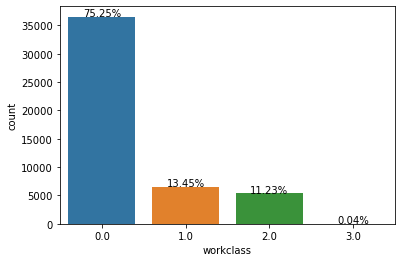

In [42]:
barplot("workclass",data)

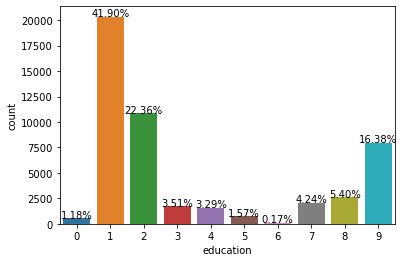

In [43]:
barplot("education",data)

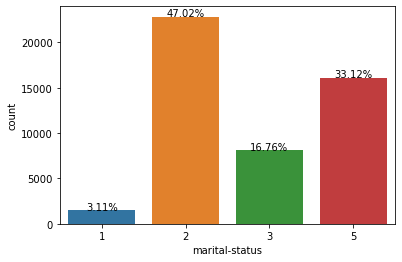

In [44]:
barplot("marital-status",data)

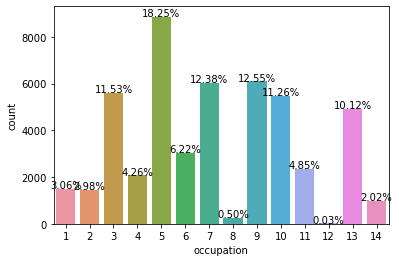

In [45]:
barplot("occupation",data)

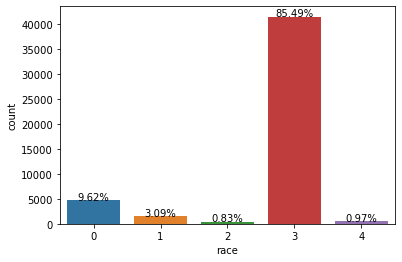

In [46]:
barplot("race",data)

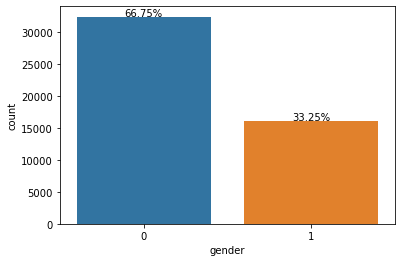

In [47]:
barplot("gender",data)

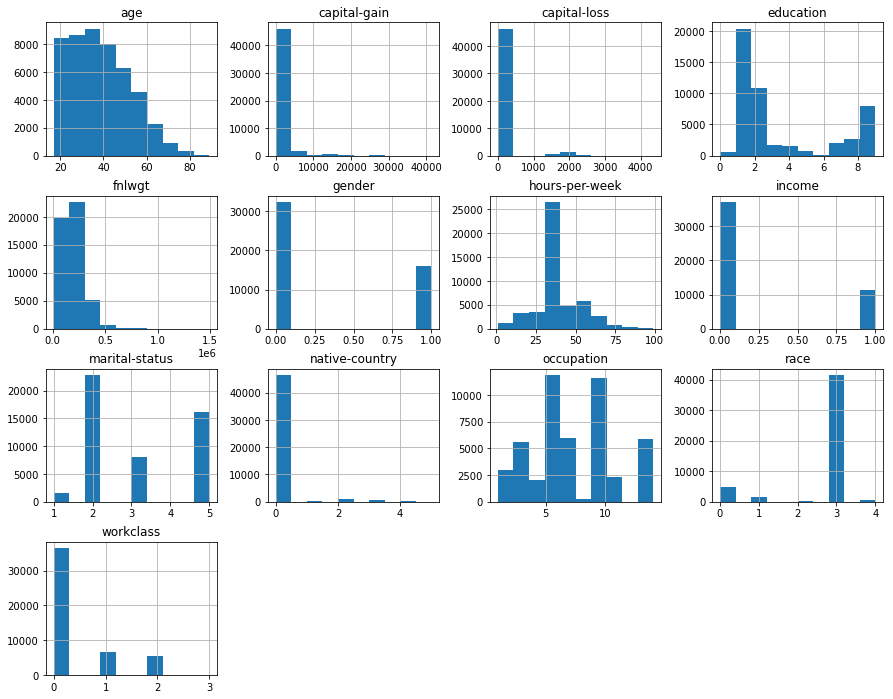

In [48]:
data.hist(figsize=(15,12));

In [49]:
data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48543.000000,48533.000000,4.854300e+04,48543.000000,48543.000000,48543.000000,48543.000000,48543.000000,48543.000000,48543.000000,48543.000000,48543.000000,48543.000000
mean,38.545352,0.360497,1.897067e+05,3.395340,3.130050,7.188925,2.650990,0.332468,580.506417,87.828461,40.374987,0.103867,0.235461
std,13.610578,0.676621,1.056436e+05,3.144371,1.379273,3.430356,0.941088,0.471103,2531.541573,403.441984,12.360258,0.516234,0.424291
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.175685e+05,1.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,1.782410e+05,2.000000,2.000000,7.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,0.000000,2.377130e+05,7.000000,5.000000,10.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,89.000000,3.000000,1.490400e+06,9.000000,5.000000,14.000000,4.000000,1.000000,41310.000000,4356.000000,99.000000,5.000000,1.000000


# Step - 5 - 
In the above steps you might have encountered many missing values and outliers. Find and treat the outliers and missing values in each column 😥 Read this Kaggle Notebook and understand various ways to detect and handle outliers. 
Try to implement the same. Outlier!!! The Silent Killer

# Distribution of Numerical columns

<AxesSubplot:xlabel='income', ylabel='age'>

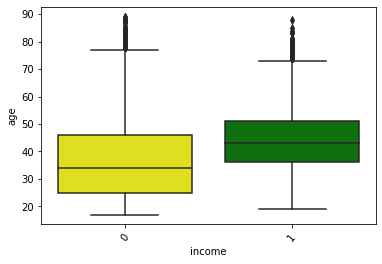

In [50]:
plt.figure(figsize=(6, 4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="age", data=data,palette=['yellow','green'])

In [51]:
data_age= data['age'].loc[data['income']==1].values

In [52]:
data_age.shape

(11430,)

As we found that there are some extreme values(outliers) in Age column, we need to eliminate them. 
we will use IQR for removing outliers

In [53]:
quantile75_age, quantile25_age = np.percentile(data_age,q=75),np.percentile(data_age,q=25)

In [54]:
quantile75_age, quantile25_age

(51.0, 36.0)

In [55]:
iqr=quantile75_age- quantile25_age
lower, upper=quantile25_age-iqr, quantile75_age + iqr
data['age']=data['age'].clip(lower=lower,upper=upper)

In [56]:
lower,upper

(21.0, 66.0)

In [57]:
data['age'].describe()

count    48543.000000
mean        38.527800
std         12.918531
min         21.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         66.000000
Name: age, dtype: float64

In [58]:
data['age'].shape

(48543,)

Box-plot after removing outliers

<AxesSubplot:xlabel='income', ylabel='age'>

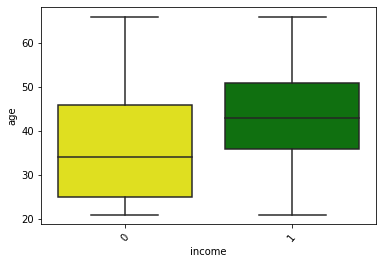

In [59]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="age", data=data,palette=['yellow','green'])

Box-plot for 'fnlwgt' column

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

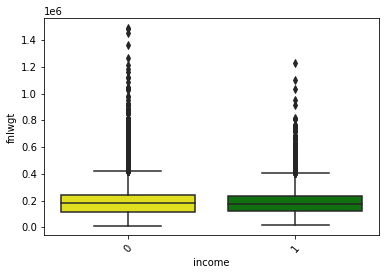

In [60]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="fnlwgt", data=data,palette=['yellow','green'])

In [61]:
data_fnlwgt= data['fnlwgt'].loc[data['income']==1].values

In [62]:
data_fnlwgt.shape

(11430,)

In [63]:
quantile75_fnlwgt, quantile25_fnlwgt = np.percentile(data_fnlwgt,q=75),np.percentile(data_fnlwgt,q=25)

In [64]:
quantile75_fnlwgt, quantile25_fnlwgt

(233571.0, 119038.75)

In [65]:
iqr=quantile75_fnlwgt- quantile25_fnlwgt
lower, upper=quantile25_fnlwgt-iqr, quantile75_fnlwgt + iqr
data['fnlwgt']=data['fnlwgt'].clip(lower=lower,upper=upper)

In [66]:
lower,upper

(4506.5, 348103.25)

In [67]:
data['fnlwgt'].describe()

count     48543.000000
mean     183336.771440
std       88049.561768
min       12285.000000
25%      117568.500000
50%      178241.000000
75%      237713.000000
max      348103.250000
Name: fnlwgt, dtype: float64

In [68]:
data['fnlwgt'].shape

(48543,)

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

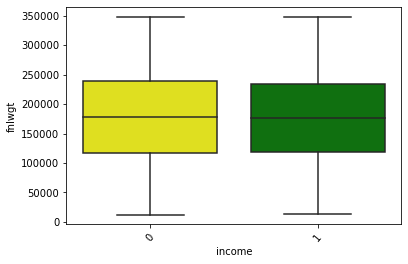

In [69]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="fnlwgt", data=data,palette=['yellow','green'])

Box-plot for 'capital-gain' column

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

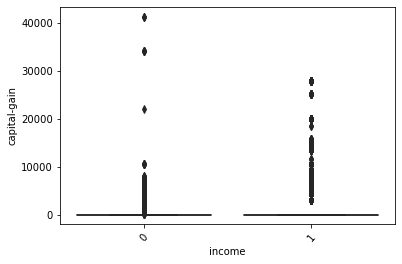

In [70]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="capital-gain", data=data,palette=['yellow','green'])

Box-plot for 'capital-loss' column

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

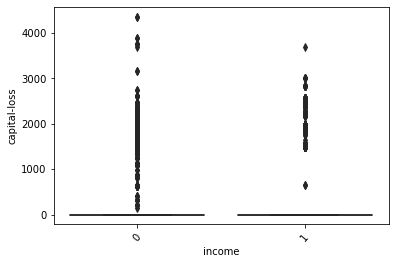

In [71]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="capital-loss", data=data,palette=['yellow','green'])

Box-plot for 'hours-per-week' column

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

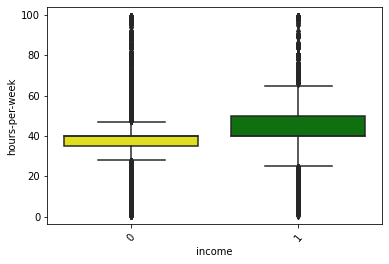

In [72]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="hours-per-week", data=data,palette=['yellow','green'])

In [73]:
data_hpw= data['hours-per-week'].loc[data['income']==1].values

In [74]:
data_hpw.shape

(11430,)

In [75]:
quantile75_hpw, quantile25_hpw = np.percentile(data_hpw,q=75),np.percentile(data_hpw,q=25)

In [76]:
quantile75_hpw, quantile25_hpw

(50.0, 40.0)

In [77]:
iqr=quantile75_hpw- quantile25_hpw
lower, upper=quantile25_hpw-iqr, quantile75_hpw + iqr
data['hours-per-week']=data['hours-per-week'].clip(lower=lower,upper=upper)

In [78]:
lower,upper

(30.0, 60.0)

In [79]:
data['hours-per-week'].describe()

count    48543.000000
mean        41.415446
std          8.096889
min         30.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         60.000000
Name: hours-per-week, dtype: float64

In [80]:
data['hours-per-week'].shape

(48543,)

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

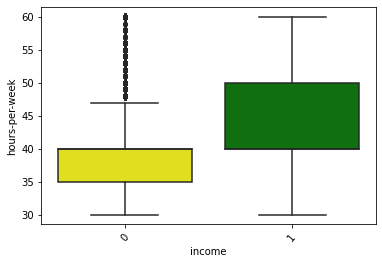

In [81]:
plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="hours-per-week", data=data,palette=['yellow','green'])

In [82]:
data_hpw= data['hours-per-week'].loc[data['income']==0].values

In [83]:
data_hpw.shape

(37113,)

In [84]:
quantile75_hpw, quantile25_hpw = np.percentile(data_hpw,q=75),np.percentile(data_hpw,q=25)

In [85]:
quantile75_hpw, quantile25_hpw

(40.0, 35.0)

In [86]:
iqr=quantile75_hpw- quantile25_hpw
lower, upper=quantile25_hpw-iqr, quantile75_hpw + iqr
data['hours-per-week']=data['hours-per-week'].clip(lower=lower,upper=upper)

In [87]:
lower,upper

(30.0, 45.0)

In [88]:
data['hours-per-week'].describe()

count    48543.000000
mean        39.449004
std          4.969893
min         30.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         45.000000
Name: hours-per-week, dtype: float64

In [89]:
data['hours-per-week'].shape

(48543,)

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

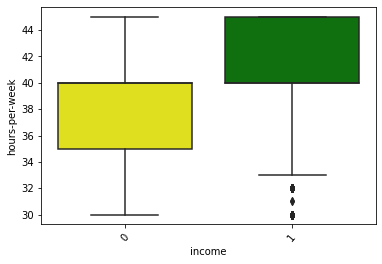

In [90]:
#Box-plot after removing outliers 

plt.figure(figsize=(6,4))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="hours-per-week", data=data,palette=['yellow','green'])

# Step - 4 - 
Bivariate Analysis Discover the relationships between numerical columns using Scatter plots, 
hexbin plots, pair plots, etc.. Identify the patterns between categorical and 
numerical columns using swarmplot, boxplot, barplot, etc.. Mention observations after each plot.

In [91]:
cat_attr = ['workclass','education','marital-status','occupation','race','gender']

In [92]:
#Type conversions
data['workclass']=data['workclass'].astype('category')
data['education']=data['education'].astype('category')
data['marital-status']=data['marital-status'].astype('category')
data['occupation']=data['occupation'].astype('category')
data['race']=data['race'].astype('category')
data['gender']=data['gender'].astype('category')


In [93]:
num_attr = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week','income','native-country']

In [94]:
data[num_attr] = data[num_attr].astype('int')

In [95]:
# checking the data types after converting.
data.dtypes

age                  int32
workclass         category
fnlwgt               int32
education         category
marital-status    category
occupation        category
race              category
gender            category
capital-gain         int32
capital-loss         int32
hours-per-week       int32
native-country       int32
income               int32
dtype: object

# Checking the correlation

<AxesSubplot:>

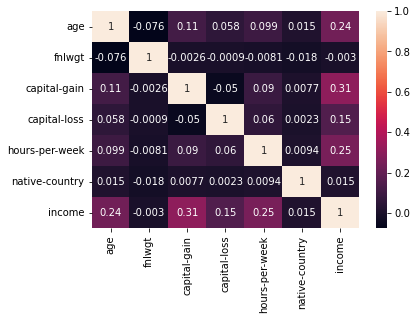

In [96]:
sns.heatmap(data.corr(),annot=True)

Scatterplots to find relationships between numerical columns

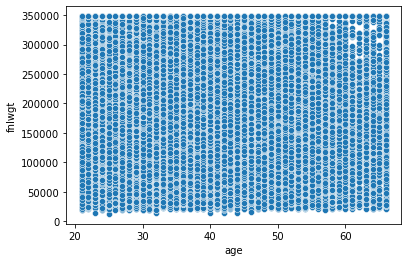

In [97]:
import seaborn as sns
sns.scatterplot(x="age", y="fnlwgt", data=data);

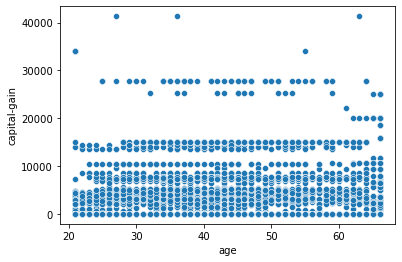

In [98]:
sns.scatterplot(x="age", y="capital-gain", data=data);

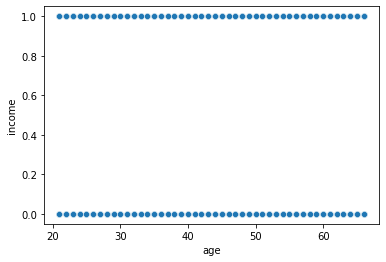

In [99]:
sns.scatterplot(x='age',y='income',data=data);

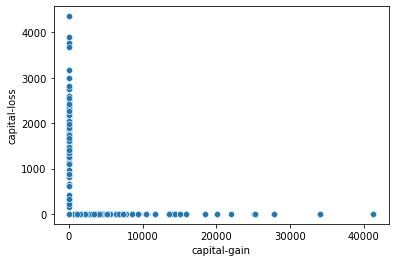

In [100]:
sns.scatterplot(x='capital-gain',y='capital-loss',data=data);

# Relationship of categorical variables with the target variable

In [101]:
pd.crosstab(data['workclass'],data['income'])

income,0,1
workclass,,
0.0,29020,7511
1.0,4526,2003
2.0,3538,1914
3.0,19,2


In [102]:
pd.crosstab(data['education'],data['income'])

income,0,1
education,,
0,163,408
1,17608,2730
2,8807,2045
3,1610,96
4,1187,410
5,216,547
6,82,1
7,1539,519
8,1196,1426


In [103]:
pd.crosstab(data['marital-status'],data['income'])

income,0,1
marital-status,,
1,1383,126
2,12973,9850
3,7388,746
5,15369,708


In [104]:
pd.crosstab(data['occupation'],data['income'])

income,0,1
occupation,,
1,1316,170
2,1026,419
3,4838,759
4,1933,136
5,5920,2939
6,2647,371
7,3173,2837
8,239,3
9,4726,1365


In [105]:
pd.crosstab(data['race'],data['income'])

income,0,1
race,,
0,4116,555
1,1104,394
2,356,47
3,31122,10379
4,415,55


In [106]:
pd.crosstab(data['gender'],data['income'])

income,0,1
gender,,
0,22704,9700
1,14409,1730


In [107]:
pd.crosstab(data['native-country'],data['income'])

income,0,1
native-country,,
0,35575,10882
1,187,15
2,686,284
3,550,229
4,93,19
5,22,1


# Step - 7 
Perform feature transformation: For Numerical Features -> Do Column Standardization For Categorical 
if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.

# Train and test split

Target Attribute Distribution

In [108]:
data['income'].value_counts()

0    37113
1    11430
Name: income, dtype: int64

In [109]:
data['income'].value_counts(normalize=True)*100

0    76.453866
1    23.546134
Name: income, dtype: float64

# Split the data into Train and Test

sklearn.model_selection.train_test_split

Split arrays or matrices into random train and test subsets

In [110]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) 

Target Attribute Distribution after Train Test Split

In [111]:
print(pd.value_counts(y_train)/y_train.count() * 100)

print(pd.value_counts(y_test) /y_test.count() * 100)

0    76.33608
1    23.66392
Name: income, dtype: float64
0    76.728696
1    23.271304
Name: income, dtype: float64


# Standardize the numerical attributes
Note: For Decision Tree and Random Forest Numeric attributes need not be standardized

In [112]:
num_attr = X_train.select_dtypes(include=['int32']).columns
num_attr

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')

# Using StandardScaler, standardize the numerical attributes

In [113]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [114]:
X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

In [115]:
print(X_train_std.shape)
print(X_test_std.shape)

(33980, 6)
(14563, 6)


# Converting Categorical attributes to Numeric attributes
Store categorical attributes name

In [116]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender'],
      dtype='object')

Using OneHotEncoder, converting Categorical attributes to Numeric attributes

In [117]:
enc = OneHotEncoder(drop='first')

enc.fit(X_train[cat_attr])

OneHotEncoder(drop='first')

In [118]:
col_names = enc.get_feature_names()

In [119]:
col_names

array(['x0_1.0', 'x0_2.0', 'x0_3.0', 'x0_nan', 'x1_1', 'x1_2', 'x1_3',
       'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9', 'x2_2', 'x2_3',
       'x2_5', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8',
       'x3_9', 'x3_10', 'x3_11', 'x3_12', 'x3_13', 'x3_14', 'x4_1',
       'x4_2', 'x4_3', 'x4_4', 'x5_1'], dtype=object)

In [120]:
X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

# Concatenate attribute
Standardised numeric attributes and One hot encoded categorical attributes

In [121]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [122]:
X_train_con.shape

(33980, 40)

# Step - 8 
Build various Machine Learning models considering ‘income’ as target variable

# Decision Tree

In [123]:
clf_dt = DecisionTreeClassifier(max_depth=10)

In [124]:
clf_dt.fit(X_train_con,y_train)

DecisionTreeClassifier(max_depth=10)

In [125]:
y_pred_train = clf_dt.predict(X_train_con)
y_pred_val = clf_dt.predict(X_test_con)

In [126]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [127]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1', 
                               'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_accuracy  = accuracy_score(train_actual, train_predicted)
    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_accuracy   = accuracy_score(test_actual, test_predicted)
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                  train_accuracy, train_recall, train_precision, train_f1score,
                                                  test_accuracy, test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [128]:
scores = get_metrics(y_train, y_pred_train, y_pred_val, y_test, "DecisionTrees", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.864244,0.864244,0.8585,0.85858,0.851748,0.851748,0.869462,0.858212


In [129]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_val)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8865    0.9429    0.9138     25939
           1     0.7681    0.6106    0.6804      8041

    accuracy                         0.8642     33980
   macro avg     0.8273    0.7767    0.7971     33980
weighted avg     0.8585    0.8642    0.8586     33980


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8791    0.9355    0.9064     11174
           1     0.7302    0.5757    0.6438      3389

    accuracy                         0.8517     14563
   macro avg     0.8046    0.7556    0.7751     14563
weighted avg     0.8444    0.8517    0.8453     14563



# Random Forest

In [130]:
clf_rf = RandomForestClassifier()

In [131]:
clf_rf.fit(X=X_train_con, y=y_train)

RandomForestClassifier()

In [132]:
y_pred_train1 = clf_rf.predict(X_train_con)
y_pred_val1 = clf_rf.predict(X_test_con)

In [133]:
classifcation_report_train_test(y_train, y_pred_train1, y_test, y_pred_val1)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9992    0.9996    0.9994     25939
           1     0.9986    0.9975    0.9981      8041

    accuracy                         0.9991     33980
   macro avg     0.9989    0.9985    0.9987     33980
weighted avg     0.9991    0.9991    0.9991     33980


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8822    0.9260    0.9036     11174
           1     0.7083    0.5925    0.6452      3389

    accuracy                         0.8484     14563
   macro avg     0.7953    0.7592    0.7744     14563
weighted avg     0.8418    0.8484    0.8435     14563



In [134]:
scores = get_metrics(y_train, y_pred_train1, y_test, y_pred_val1, "RandomForest", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.864244,0.864244,0.858500,0.858580,0.851748,0.851748,0.869462,0.858212
1,RandomForest,0.999088,0.999088,0.999088,0.999088,0.848383,0.848383,0.841765,0.843469


# AdaBoost

In [135]:
clf_adaboost =  AdaBoostClassifier()

In [136]:
clf_adaboost.fit(X_train_con, y_train)

AdaBoostClassifier()

In [137]:
y_pred_train2 = clf_adaboost.predict(X_train_con)
y_pred_val2 = clf_adaboost.predict(X_test_con)

In [138]:
classifcation_report_train_test(y_train, y_pred_train2, y_test, y_pred_val2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8845    0.9385    0.9107     25939
           1     0.7529    0.6045    0.6706      8041

    accuracy                         0.8595     33980
   macro avg     0.8187    0.7715    0.7907     33980
weighted avg     0.8533    0.8595    0.8539     33980


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8828    0.9354    0.9083     11174
           1     0.7349    0.5904    0.6548      3389

    accuracy                         0.8551     14563
   macro avg     0.8088    0.7629    0.7815     14563
weighted avg     0.8483    0.8551    0.8493     14563



In [139]:
scores = get_metrics(y_train, y_pred_train2, y_test, y_pred_val2, "Adaboost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.864244,0.864244,0.858500,0.858580,0.851748,0.851748,0.869462,0.858212
1,RandomForest,0.999088,0.999088,0.999088,0.999088,0.848383,0.848383,0.841765,0.843469
2,Adaboost,0.859476,0.859476,0.853341,0.853877,0.855112,0.855112,0.848348,0.849315


# Gradient Boost

In [140]:
clf_gbm = GradientBoostingClassifier()

In [141]:
clf_gbm.fit(X=X_train_con, y=y_train)

GradientBoostingClassifier()

In [142]:
y_pred_train3 = clf_gbm.predict(X_train_con)
y_pred_val3 = clf_gbm.predict(X_test_con)

In [143]:
classifcation_report_train_test(y_train, y_pred_train3, y_test, y_pred_val3)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8850    0.9484    0.9156     25939
           1     0.7834    0.6024    0.6811      8041

    accuracy                         0.8665     33980
   macro avg     0.8342    0.7754    0.7983     33980
weighted avg     0.8610    0.8665    0.8601     33980


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8824    0.9471    0.9136     11174
           1     0.7700    0.5839    0.6642      3389

    accuracy                         0.8626     14563
   macro avg     0.8262    0.7655    0.7889     14563
weighted avg     0.8563    0.8626    0.8556     14563



In [144]:
scores = get_metrics(y_train, y_pred_train3, y_test, y_pred_val3, "GBM", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.864244,0.864244,0.858500,0.858580,0.851748,0.851748,0.869462,0.858212
1,RandomForest,0.999088,0.999088,0.999088,0.999088,0.848383,0.848383,0.841765,0.843469
2,Adaboost,0.859476,0.859476,0.853341,0.853877,0.855112,0.855112,0.848348,0.849315
3,GBM,0.866510,0.866510,0.860957,0.860099,0.862597,0.862597,0.856276,0.855583


# XGBoost

In [145]:
!pip install xgboost

In [146]:
from xgboost import XGBClassifier

In [147]:
XGBClassifier(enable_categorical=True)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=True, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [148]:
clf_xgb = XGBClassifier()

In [149]:
X_train=X_train_con.astype(int)

In [150]:
clf_xgb.fit(X=X_train_con, y=y_train)

[22:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
X_val=X_test_con.astype(int)

In [152]:
y_pred_train4 = clf_xgb.predict(X_train_con)
y_pred_val4 = clf_xgb.predict(X_test_con)

In [153]:
classifcation_report_train_test(y_train, y_pred_train4, y_test, y_pred_val4)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9130    0.9593    0.9356     25939
           1     0.8430    0.7051    0.7679      8041

    accuracy                         0.8991     33980
   macro avg     0.8780    0.8322    0.8518     33980
weighted avg     0.8964    0.8991    0.8959     33980


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8898    0.9420    0.9151     11174
           1     0.7629    0.6152    0.6811      3389

    accuracy                         0.8660     14563
   macro avg     0.8263    0.7786    0.7981     14563
weighted avg     0.8602    0.8660    0.8607     14563



# Step - 9 
Create a table to compare the performance of each of the ML Model

In [154]:
scores = get_metrics(y_train, y_pred_train4, y_test, y_pred_val4, "XGBoost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.864244,0.864244,0.858500,0.858580,0.851748,0.851748,0.869462,0.858212
1,RandomForest,0.999088,0.999088,0.999088,0.999088,0.848383,0.848383,0.841765,0.843469
2,Adaboost,0.859476,0.859476,0.853341,0.853877,0.855112,0.855112,0.848348,0.849315
3,GBM,0.866510,0.866510,0.860957,0.860099,0.862597,0.862597,0.856276,0.855583
4,XGBoost,0.899147,0.899147,0.896437,0.895903,0.865962,0.865962,0.860247,0.860691
